# A *real-world* demo of data analysis

## topics covered:

1. import data with correct data types
2. merge/combine `DataFrame`s for easier analysis
    * how to read/understand technical manuals? 
        differences between manual and tutorial
    * utilise examples
    
3. get ensembles using `GroupBy`-related functions

4. understand the "notorious" `matplotlib`-based plotting:
http://pbpython.com/effective-matplotlib.html

5. plotting like a pro using `seaborn`
    * understand the desirable data format for using `seaborn`
    * some useful plot types
    * beautify your plots

## practical part

In [1]:
from pathlib import Path
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
path_data_dir=Path('../data')

In [3]:
list(path_data_dir.glob('*csv'))

[PosixPath('../data/WP_stable_rawdata.csv'),
 PosixPath('../data/EC_rawdata.csv'),
 PosixPath('../data/UoR_Data_EC.csv'),
 PosixPath('../data/PM_rawdata.csv'),
 PosixPath('../data/UoR_Data_5min.csv'),
 PosixPath('../data/WP_unstable_rawdata.csv')]

In [4]:
path_data_5min=path_data_dir/'UoR_Data_5min.csv'
path_data_EC=path_data_dir/'UoR_Data_EC.csv'

In [5]:
list_dates= pd.date_range('2018 09 01','2018 10 01')
list_start=list_dates[:-1]
list_end=list_dates[1:]

In [6]:
url_data_5min_template = (
    'https://metdata.reading.ac.uk/ext/dataset/'
    '5min_Level2/get_data'
    '?token=3bab029493'
    '&start_date={start:%Y-%m-%d-%H:%M:%S%z}'
    '&end_date={end:%Y-%m-%d-%H:%M:%S%z}'
    '&var=TSoil100&var=TSoil10&var=TSoil20&var=TSoil30&var=TSoil50&var=TSoil5&var=Tsoil&var=Tconc&var=Tdew_der&var=VP_der&var=Twet_der&var=Td&var=Tgrass&var=Tw&var=RH&var=U10max_der&var=U10run_der&var=Dirn10&var=U10&var=U2run_der&var=U5max_der&var=U5run_der&var=Dirn5&var=U5&var=Sdur&var=Sg_accum_der&var=Sdur_accum_der&var=CNR4T&var=Sd&var=Sb&var=Sg&var=G&var=Ldw&var=Ldw(uc)&var=Luw&var=Luw(uc)&var=Rn&var=Sb(csd3)&var=Sdw&var=Suw&var=Pmsl&var=P&var=Rain&var=Rain_accum_der'
    '&missing=NaN&data_format=csv')
list_url_data_5min=[url_data_5min_template.format(start=start,end=end) for start, end in zip(list_start,list_end)]

In [7]:
rawdata_5min=pd.concat([pd.read_csv(url,header=[0, 1]) for url in list_url_data_5min])

In [8]:
data_5min=rawdata_5min.set_index(('TimeStamp','timestamp'))

In [9]:
data_5min.head()

,TSoil100,TSoil10,TSoil20,TSoil30,TSoil50,TSoil5,Tsoil,Tconc,Tdew_der,VP_der,...,Luw,Luw(uc),Rn,Sb(csd3),Sdw,Suw,Pmsl,P,Rain,Rain_accum_der
,degC,degC,degC,degC,degC,degC,degC,degC,degC,hPa,...,W/m^2,W/m^2,W/m^2,W/m^2,W/m^2,W/m^2,hPa,hPa,mm,mm
"(TimeStamp, timestamp)",,,,,,,,,,,,,,,,,,,,,
2018-09-01 00:05:00,16.95,17.44,17.56,17.50,16.83,16.99,10.51,13.43,10.21,12.45,...,347.26,-13.28,-37.87,-4.8,-0.84,2.10,1024.69,1016.61,0.0,0.0
2018-09-01 00:10:00,16.96,17.42,17.56,17.51,16.83,16.96,10.65,13.54,10.14,12.40,...,346.82,-13.61,-35.03,-4.7,-2.27,2.26,1024.64,1016.55,0.0,0.0
2018-09-01 00:15:00,16.96,17.39,17.55,17.50,16.84,16.93,10.52,13.38,9.94,12.24,...,346.18,-13.35,-36.05,-4.7,-2.03,1.30,1024.61,1016.51,0.0,0.0
2018-09-01 00:20:00,16.95,17.37,17.54,17.51,16.84,16.89,10.30,13.08,10.40,12.61,...,346.56,-13.80,-35.92,-4.9,-0.40,3.46,1024.57,1016.48,0.0,0.0
2018-09-01 00:25:00,16.95,17.35,17.53,17.50,16.84,16.86,10.36,13.12,10.18,12.43,...,346.42,-13.76,-41.32,-4.7,-1.73,1.22,1024.55,1016.45,0.0,0.0


In [10]:
url_data_EC_template = (
    'https://metdata.reading.ac.uk/ext/dataset/'
    'eddy_cov/get_data'
    '?token=3bab029493'
    '&start_date={start:%Y-%m-%d-%H:%M:%S%z}'
    '&end_date={end:%Y-%m-%d-%H:%M:%S%z}'
    '&var=WS&var=dir&var=L&var=zL&var=C_CO2&var=cov_uv&var=cov_uw&var=cov_vw&var=ustar&var=Tsonic&var=nSamples&var=q&var=sd_C_CO2&var=sd_Tsonic&var=sd_q&var=sd_u&var=sd_v&var=sd_w&var=F_CO2&var=Q_E&var=Q_H&'
    '&missing=NaN&data_format=csv')
list_url_data_EC=[url_data_EC_template.format(start=start,end=end) for start, end in zip(list_start,list_end)]

In [22]:
rawdata_EC.head()

,TimeStamp,WS,dir,L,zL,C_CO2,cov_uv,cov_uw,cov_vw,ustar,...,q,sd_C_CO2,sd_Tsonic,sd_q,sd_u,sd_v,sd_w,F_CO2,Q_E,Q_H
0,timestamp,m.s-1,degree,m,dimensionless,mmol.m-3,m2.s-2,m2.s-2,m2.s-2,m.s-1,...,kg.kg-1,mmol.m-3,Celsius,kg.kg-1,m.s-1,m.s-1,m-2/3,umol.m-2.s-1,W.m-2,W.m-2
1,2018-09-01 00:30:00,0.195,202.3,4.584,0.63269,NaN,0.0171,0.00236,0.0002,0.0487,...,NaN,NaN,0.346,NaN,0.227,0.1765,0.0505,NaN,NaN,-4.236
2,2018-09-01 01:00:00,0.1427,155.7,-10.262,-0.28259,NaN,-0.018,0.00297,0.000366,0.0547,...,NaN,NaN,0.376,NaN,0.176,0.2768,0.0419,NaN,NaN,2.717
3,2018-09-01 01:30:00,0.1527,264.8,0.834,3.47569,0.000671,-0.00245,0.000465,-2.65e-06,0.0216,...,NaN,1.16e-05,0.309,NaN,0.129,0.1478,0.0237,0.2776,NaN,-1.995
4,2018-09-01 02:00:00,0.1191,155.8,-20.08,-0.14442,0.000701,-0.00874,-0.00655,-0.00253,0.0838,...,NaN,1.51e-05,0.256,NaN,0.334,0.2337,0.0492,-9.6545,NaN,4.82


In [11]:
rawdata_EC=pd.concat([pd.read_csv(url) for url in list_url_data_EC])

In [12]:
data_EC=rawdata_EC.drop_duplicates().T.set_index(0,append=True).T.set_index(('TimeStamp','timestamp'))

In [13]:
data_5min.index=data_5min.index.astype(np.datetime64)

In [14]:
data_30min=data_5min.resample('30T').mean()

In [15]:
data_EC.index=data_EC.index.astype(np.datetime64)

In [16]:
data_ana=pd.concat([data_30min,data_EC],axis=1)

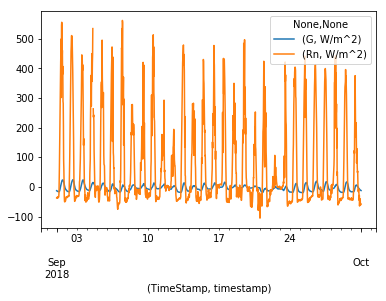

In [17]:
data_ana.loc[:,['Rn','Q_H','Q_E','G']].plot()

In [18]:
data_ana.columns.levels[0]

Index(['CNR4T', 'C_CO2', 'Dirn10', 'Dirn5', 'F_CO2', 'G', 'L', 'Ldw',
       'Ldw(uc)', 'Luw', 'Luw(uc)', 'P', 'Pmsl', 'Q_E', 'Q_H', 'RH', 'Rain',
       'Rain_accum_der', 'Rn', 'Sb', 'Sb(csd3)', 'Sd', 'Sdur',
       'Sdur_accum_der', 'Sdw', 'Sg', 'Sg_accum_der', 'Suw', 'TSoil10',
       'TSoil100', 'TSoil20', 'TSoil30', 'TSoil5', 'TSoil50', 'Tconc', 'Td',
       'Tdew_der', 'Tgrass', 'Tsoil', 'Tsonic', 'Tw', 'Twet_der', 'U10',
       'U10max_der', 'U10run_der', 'U2run_der', 'U5', 'U5max_der', 'U5run_der',
       'VP_der', 'WS', 'cov_uv', 'cov_uw', 'cov_vw', 'dir', 'nSamples', 'q',
       'sd_C_CO2', 'sd_Tsonic', 'sd_q', 'sd_u', 'sd_v', 'sd_w', 'ustar', 'zL'],
      dtype='object')

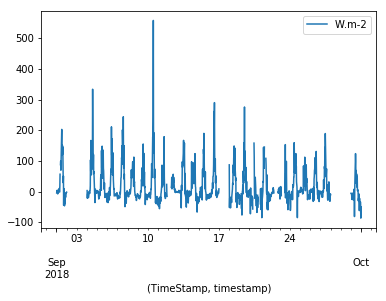

In [23]:
# data_ana.Q_H.values

data_ana.Q_H.astype(float).plot()

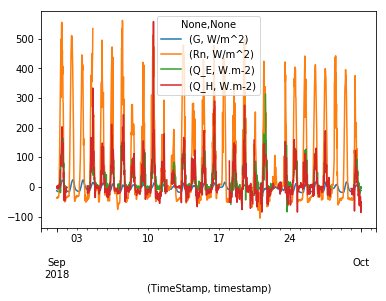

In [24]:
data_ana.loc[:,['Rn','Q_H','Q_E','G']].astype(float).plot()

In [29]:
data_ana.index

DatetimeIndex(['2018-09-01 00:00:00', '2018-09-01 00:30:00',
               '2018-09-01 01:00:00', '2018-09-01 01:30:00',
               '2018-09-01 02:00:00', '2018-09-01 02:30:00',
               '2018-09-01 03:00:00', '2018-09-01 03:30:00',
               '2018-09-01 04:00:00', '2018-09-01 04:30:00',
               ...
               '2018-09-30 19:30:00', '2018-09-30 20:00:00',
               '2018-09-30 20:30:00', '2018-09-30 21:00:00',
               '2018-09-30 21:30:00', '2018-09-30 22:00:00',
               '2018-09-30 22:30:00', '2018-09-30 23:00:00',
               '2018-09-30 23:30:00', '2018-10-01 00:00:00'],
              dtype='datetime64[ns]', name=('TimeStamp', 'timestamp'), length=1441, freq='30T')

In [28]:
grp_hr_min.groups

{(0, 0): DatetimeIndex(['2018-09-01', '2018-09-02', '2018-09-03', '2018-09-04',
                '2018-09-05', '2018-09-06', '2018-09-07', '2018-09-08',
                '2018-09-09', '2018-09-10', '2018-09-11', '2018-09-12',
                '2018-09-13', '2018-09-14', '2018-09-15', '2018-09-16',
                '2018-09-17', '2018-09-18', '2018-09-19', '2018-09-20',
                '2018-09-21', '2018-09-22', '2018-09-23', '2018-09-24',
                '2018-09-25', '2018-09-26', '2018-09-27', '2018-09-28',
                '2018-09-29', '2018-09-30', '2018-10-01'],
               dtype='datetime64[ns]', name=('TimeStamp', 'timestamp'), freq='1440T'),
 (0, 30): DatetimeIndex(['2018-09-01 00:30:00', '2018-09-02 00:30:00',
                '2018-09-03 00:30:00', '2018-09-04 00:30:00',
                '2018-09-05 00:30:00', '2018-09-06 00:30:00',
                '2018-09-07 00:30:00', '2018-09-08 00:30:00',
                '2018-09-09 00:30:00', '2018-09-10 00:30:00',
                '2018-0

In [25]:
grp_hr_min=data_ana.groupby([data_ana.index.hour.rename('hour'),data_ana.index.minute.rename('minute')])
grp_hr_min.quantile([.25,.5,.75])

TSoil100    TSoil10    TSoil20    TSoil30    TSoil50  \
                       degC       degC       degC       degC       degC   
hour minute                                                               
0    0      0.25  16.203333  13.750833  14.415000  14.777500  15.242500   
            0.50  16.620000  16.590000  16.726667  16.915000  16.663333   
            0.75  16.896667  17.685833  17.789167  17.642500  16.966667   
     30     0.25  16.267917  14.052500  14.885833  15.364167  15.660000   
            0.50  16.627500  16.763333  16.780833  16.965833  16.685833   
            0.75  16.907500  17.606250  17.760417  17.643333  16.975000   
1    0      0.25  16.265417  14.017500  14.851250  15.344583  15.652500   
            0.50  16.627500  16.710833  16.765000  16.914167  16.696667   
            0.75  16.907500  17.500417  17.716250  17.640417  16.975000   
     30     0.25  16.265000  13.984583  14.813333  15.324583  15.646250   
            0.50  16.625833  16.665000  16.751667  16.869167  16.705833   
            0.75  16.907083  17.442917  17.680000  17.635000  16.977500   
2    0      0.25  16.265000  13.944583  14.776667  15.304167  15.633333   
            0.50  16.620833  16.619167  16.737500  16.850833  16.708333   
            0.75  16.905000  17.381667  17.634583  17.626667  16.983750   
     30     0.25  16.262500  13.912917  14.743750  15.284167  15.623333   
            0.50  16.620000  16.576667  16.720833  16.824167  16.703333   
            0.75  16.907500  17.366250  17.565833  17.620417  16.986667   
3    0      0.25  16.262917  13.882917  14.706667  15.260000  15.608333   
            0.50  16.619167  16.510000  16.710000  16.800000  16.695000   
            0.75  16.911667  17.302917  17.472917  17.614167  16.992917   
     30     0.25  16.265000  13.854167  14.672500  15.236667  15.599583   
            0.50  16.610833  16.428333  16.695000  16.776667  16.685000   
            0.75  16.908750  17.230000  17.390417  17.597083  16.993750   
4    0      0.25  16.262917  13.823750  14.638750  15.215000  15.587917   
            0.50  16.610000  16.350000  16.662500  16.745833  16.675000   
            0.75  16.910000  17.180417  17.312500  17.584167  16.995000   
     30     0.25  16.258750  13.795417  14.608750  15.189583  15.574167   
            0.50  16.605833  16.272500  16.625000  16.738333  16.662500   
            0.75  16.908333  17.150000  17.280833  17.557083  16.994583   
...                     ...        ...        ...        ...        ...   
19   0      0.25  16.218750  14.350833  14.537917  14.667500  15.144583   
            0.50  16.559167  17.220833  16.961667  16.810000  16.501667   
            0.75  16.865833  18.263333  18.024167  17.540417  16.868750   
     30     0.25  16.215417  14.286667  14.551667  14.669167  15.137083   
            0.50  16.562500  17.155000  16.970000  16.846667  16.511667   
            0.75  16.869167  18.221667  18.028750  17.563750  16.872917   
20   0      0.25  16.212083  14.223333  14.550833  14.668333  15.130000   
            0.50  16.566667  17.072500  16.967500  16.876667  16.519167   
            0.75  16.871250  18.187083  18.025000  17.588750  16.882917   
     30     0.25  16.207083  14.160000  14.537917  14.660833  15.122500   
            0.50  16.569167  16.985833  16.956667  16.905833  16.526667   
            0.75  16.869167  18.155833  18.008333  17.606250  16.889583   
21   0      0.25  16.203750  14.104583  14.514583  14.656250  15.114167   
            0.50  16.573333  16.900000  16.934167  16.915000  16.531667   
            0.75  16.867083  18.125833  17.984167  17.618750  16.897917   
     30     0.25  16.197917  14.033750  14.490000  14.644167  15.108333   
            0.50  16.578333  16.815000  16.907500  16.912500  16.540833   
            0.75  16.865833  18.080000  17.950000  17.627917  16.909167   
22   0      0.25  16.195833  13.962083  14.454583  14.629583  15.102083   
            0.50  16.575833  16.738333  16.8

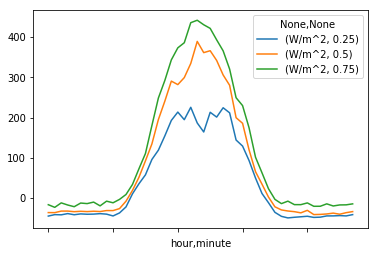

In [26]:
grp_hr_min.quantile([.25,.5,.75]).unstack().Rn.plot()

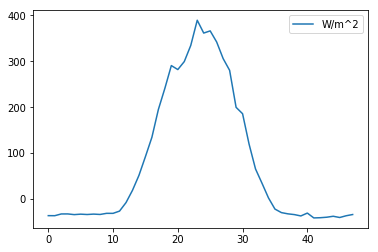

In [30]:
df_quartiles=grp_hr_min.quantile([.25,.5,.75]).unstack().swaplevel(1,2,axis=1)
ax_fill=df_quartiles.Rn.reset_index().plot(y=0.5)

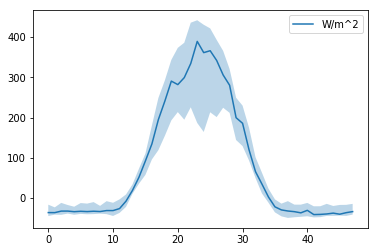

In [31]:
ax_fill.fill_between(
    df_quartiles.reset_index().index,
    df_quartiles.Rn.loc[:, 0.25].values.reshape(-1),
    df_quartiles.Rn.loc[:, 0.75].values.reshape(-1),
    alpha=0.3)
ax_fill.figure

In [32]:
df_quartiles.columns=df_quartiles.columns.droplevel(-1)

In [33]:
df_quartiles.index=pd.date_range('2018 10 01','2018 10 02',freq='30T')[:-1]

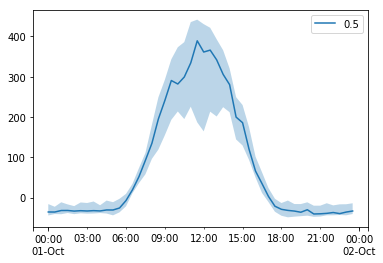

In [34]:
ax_fill=df_quartiles.Rn.plot(y=0.5)
ax_fill.fill_between(
    df_quartiles.index,
    df_quartiles.Rn.loc[:, 0.25],
    df_quartiles.Rn.loc[:, 0.75],
    alpha=0.3)
# ax_fill.figure

In [35]:
# ax_fill=
df_quartiles.swaplevel(0,1,axis=1).loc[:,0.5].plot(y=['Rn','Q_H','Q_E','G'])
# ax_fill.fill_between(
#     df_quartiles.index,
#     df_quartiles.Rn.loc[:, 0.25],
#     df_quartiles.Rn.loc[:, 0.75],
#     alpha=0.3)

KeyError: "['Q_H' 'Q_E'] not in index"

In [36]:
data_ana=pd.concat([data_30min,data_EC],axis=1).astype(float)

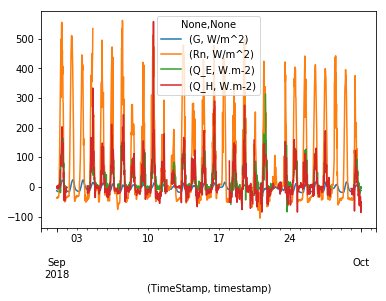

In [37]:
data_ana.loc[:,['Rn','Q_H','Q_E','G']].plot()

In [38]:
grp_hr_min=data_ana.groupby([data_ana.index.hour.rename('hour'),data_ana.index.minute.rename('minute')])
df_quartiles=grp_hr_min.quantile([.25,.5,.75]).unstack().swaplevel(1,2,axis=1)

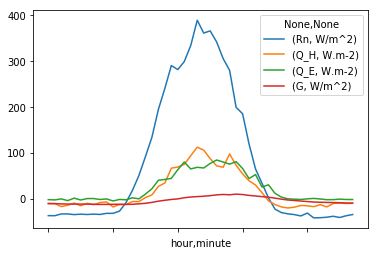

In [39]:
df_quartiles.swaplevel(0,1,axis=1).loc[:,0.5].plot(y=['Rn','Q_H','Q_E','G'])

understand the "notorious" `matplotlib`-based plotting:
http://pbpython.com/effective-matplotlib.html

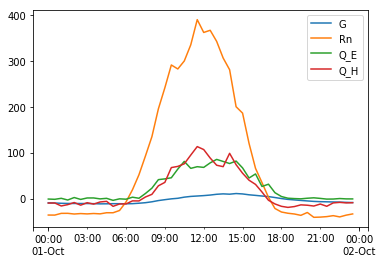

In [40]:
list_var=['Rn','Q_H','Q_E','G']
df_plot=df_quartiles.loc[:,list_var].swaplevel(0,1,axis=1)
df_plot.index=pd.date_range('2018 10 01','2018 10 02',freq='30T')[:-1]
df_plot.columns=df_plot.columns.droplevel(-1)
ax_fill=df_plot.loc[:,0.5].plot()
# ax_fill.fill_between(
#     df_quartiles.index,
#     df_quartiles.Rn.loc[:, 0.25],
#     df_quartiles.Rn.loc[:, 0.75],
#     alpha=0.3)

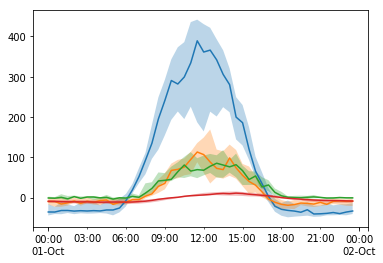

In [41]:
df_plot_var = df_plot.swaplevel(0, 1, axis=1)
fig, ax = plt.subplots(1)
for var in list_var:
    df_var = df_plot_var.loc[:, var]
    y0 = df_var[0.5]
    y1, y2 = df_var[0.75], df_var[0.25]
    y0.plot(ax=ax, label=var).fill_between(
        df_var.index, y1, y2, alpha=0.3)

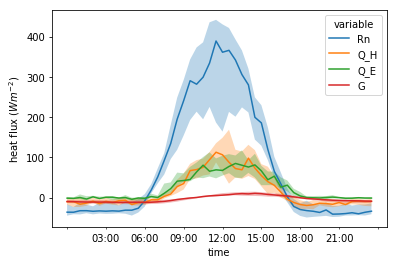

In [42]:
ax.legend(title='variable')
ax.set_xlabel('time')
ax.set_ylabel('heat flux ($W m^{-2}$)')
import matplotlib.dates as mdates
ax.xaxis.set_major_locator(mdates.HourLocator())
# ax.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))
# ax.xaxis.set_minor_formatter(mdates.DateFormatter('%H:%M'))
fig

In [ ]:
df_plot_var = df_plot.swaplevel(0, 1, axis=1)
idx_dt = mdates.date2num(df_plot_var.index)
df_plot_var.index=idx_dt
fig, ax = plt.subplots(1)
for var in list_var:
    df_var = df_plot_var.loc[:, var]
    y0 = df_var[0.5]
    y1, y2 = df_var[0.75], df_var[0.25]
    y0.plot(ax=ax, label=var).fill_between(
        df_plot_var.index, y1, y2, alpha=0.3)
ax.xaxis.set_major_locator(mdates.HourLocator(interval=3))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))

In [ ]:
df_plot_var = df_plot.swaplevel(0, 1, axis=1)
fig, ax = plt.subplots(1)
ax.xaxis.set_minor_formatter(mdates.DateFormatter('%H:%M'))
for var in list_var:
    df_var = df_plot_var.loc[:, var]
    y0 = df_var[0.5]
    y1, y2 = df_var[0.75], df_var[0.25]
    y0.plot(ax=ax, label=var).fill_between(
        df_var.index, y1, y2, alpha=0.3)
# ax.xaxis.set_major_locator(mdates.HourLocator())
# ax.xaxis.set_major_formatter(mdates.DateFormatter(''))

** [`seaborn` tutorial](https://seaborn.pydata.org/tutorial.html)**